<a href="https://colab.research.google.com/github/anmolrawat626/pregrad-projects/blob/main/Sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


In this project, I studied sales data to understand what affects profit.By applying data visualization techniques and machine learning models,it aims to identify patterns, evaluate the impact of discounts on profit, and build accurate predictive models for both regression and classification tasks.



# Importing the Dependencies

**Importing essential python libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The above mentioned libraries are essential for data analysis, manipulation, and visualization in this project:  

- **`pandas` (`pd`)** → For structured data operations (DataFrames, Series).  
- **`numpy` (`np`)** → For numerical computations and array operations.  
- **`matplotlib.pyplot` (`plt`)** → For basic plotting and visualizations.  
- **`seaborn` (`sns`)** → For advanced statistical visualizations (built on Matplotlib).  

These libraries form the foundation for data handling and exploratory analysis in Python.  


**Importing important sckitlearn components and Machine learning models**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

#### **Data Preparation**
- `train_test_split` → Split data into training/test sets
- `LabelEncoder` → Convert categorical labels to numerical

#### **Models**
- `LogisticRegression`, `LinearRegression` → Linear models
- `RandomForestRegressor` → Ensemble method for regression
- `DecisionTreeClassifier` → Tree-based classification

#### **Evaluation Metrics**
- `accuracy_score`, `confusion_matrix`, `ConfusionMatrixDisplay` → Classification metrics
- `mean_squared_error`, `r2_score` → Regression metrics
- `cross_val_score` → K-fold cross-validation

# Data cleaning and processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [ ]:
df = pd.read_csv("sales_data.csv")
df.head()

,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
print(df.shape)

(9994, 6)


# **Data visulaizations**

**BarPlot**

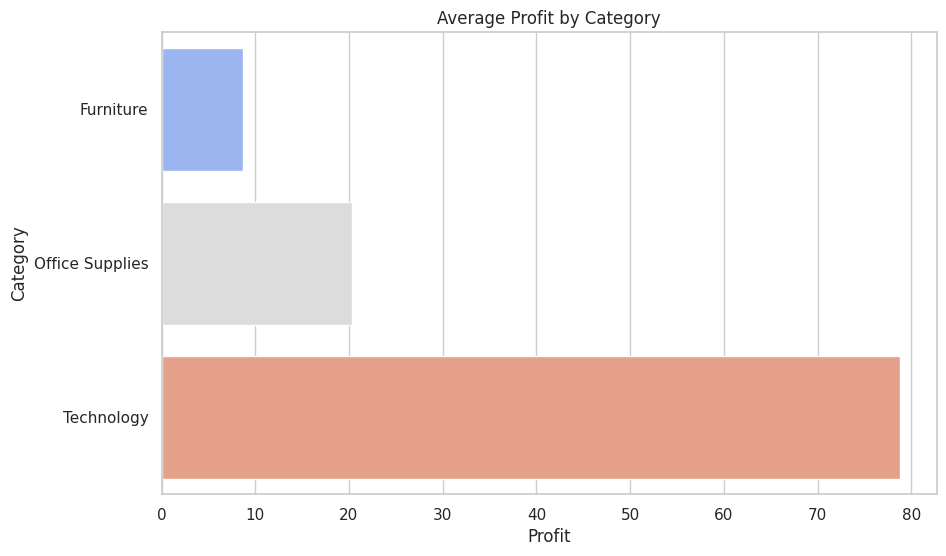

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

category_profit = df.groupby('Category')['Profit'].mean().reset_index()

sns.barplot(x='Profit', y='Category', data=category_profit, hue='Category', palette='coolwarm',legend=False )
plt.title('Average Profit by Category')
plt.xlabel('Profit')
plt.ylabel('Category')
plt.show()

upon analyzing the above barplot, i got to know

**Technology** -> stands out as the most profitable category, with an average profit significantly higher than the other two categories.

**Office Supplies** -> holds a moderate position, showing decent profitability but far behind Technology.

**Furniture** -> has the lowest average profit, suggesting either higher discounting, lower margins, or operational inefficiencies in this category.

**BoxPlot**

<Axes: xlabel='Discount', ylabel='Sub-Category'>

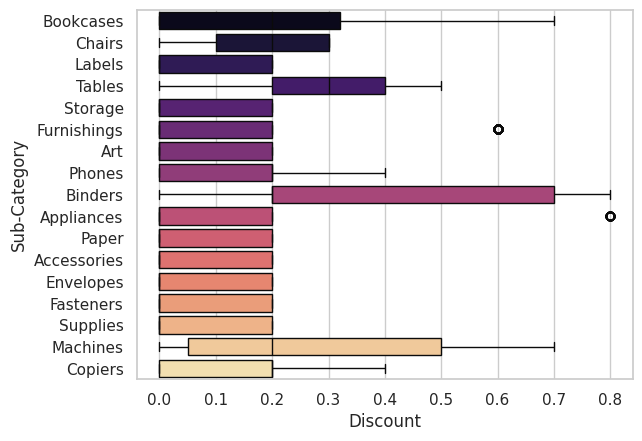

In [ ]:
sns.boxplot(
    x='Discount',
    y='Sub-Category',
    data= df,
    hue='Sub-Category',
    palette='magma',
    legend=False
)

Upon analyzing the above boxplot i got to know

**Binders and Appliances** have high average discounts with visible outliers, suggesting these products are frequently heavily discounted, which might affect profit margins.

Sub-categories like **Copiers, Machines, and Supplies** also show relatively wide discount ranges, indicating variable pricing strategies.

Categories such as **Bookcases, Chairs, Labels, and Phones** have relatively tight discount distributions, possibly due to standardized pricing or stable demand.


**Pie chart**

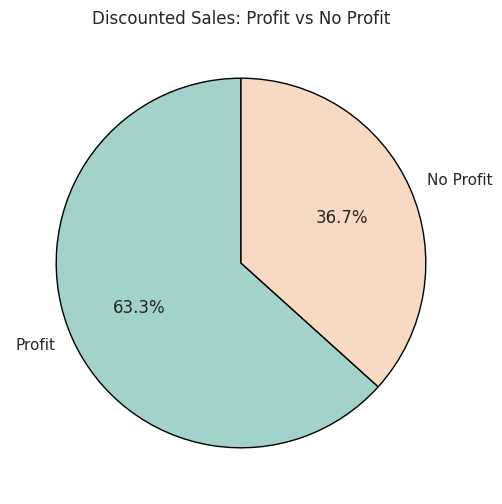

In [ ]:
df['Profit_Status'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'No Profit')
discounted = df[df['Discount'] > 0]
status_counts = discounted['Profit_Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    status_counts,labels=status_counts.index,autopct='%1.1f%%',colors=['#a3d2ca', '#f7d9c4'],startangle=90,wedgeprops={'edgecolor': 'black'}
)
plt.title('Discounted Sales: Profit vs No Profit')
plt.show()

Upon analyzing the above pie chart i got to know

**63.3%** of the discounted sales still resulted in profit, indicating that most discount strategies were successful in driving revenue without hurting profitability.

**36.7%** of discounted sales did not generate profit, which suggests that over-discounting or inefficient pricing may be hurting the business in some segments.

**Heatmap**

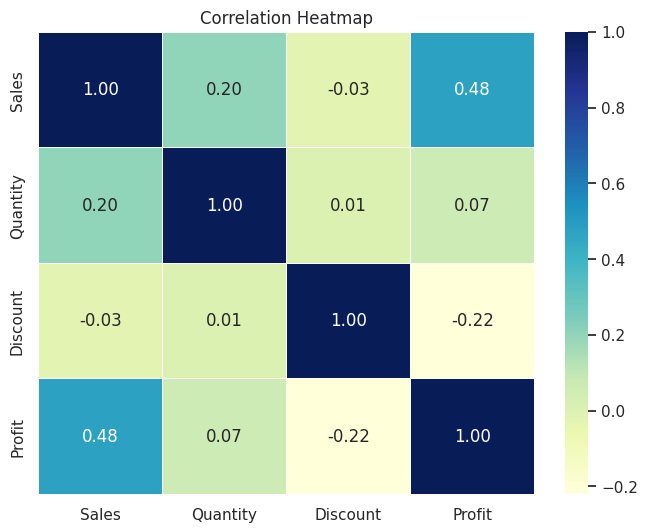

In [ ]:
numeric_cols = df[['Sales', 'Quantity', 'Discount', 'Profit']]

corr = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Upon analyzing the above heatmap, i got to know

**Sales and Profit** have a moderate positive correlation of 0.48, indicating that higher sales generally lead to higher profit, though not perfectly.

**Discount and Profit** show a negative correlation of -0.22, suggesting that increasing discounts often reduces profit, which aligns with business intuition.

**Quantity** has weak correlations with all other variables, showing that the number of units sold doesn't strongly affect profit or sales in isolation.

**Sales and Discount** have an almost negligible negative correlation (-0.03), implying discounts don’t significantly drive up sales in this dataset.

##"Predictive Modeling: Regression and Classifier Algorithms"

**Data Cleaning: Handling Outliers with IQR**

In [ ]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

 Calculated interquartile range (IQR) for 'Profit'
- Identified outliers: Values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR
- Created cleaned dataset (`df_no_outliers`) with outliers removed

**Feature Engineering & Train-Test Split**

In [ ]:
X = df_no_outliers.drop('Profit', axis=1)
y = df_no_outliers['Profit']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Separated features (`X`) and target (`y`)
- Applied one-hot encoding to categorical features
- Split data into training (80%) and test sets (20%) with `random_state=42`

**Profit Prediction Using Linear Regression: Ipmlementation and Evaluation**

Mean Squared Error: 183.42609818376363
R² Score: 0.500827980352635


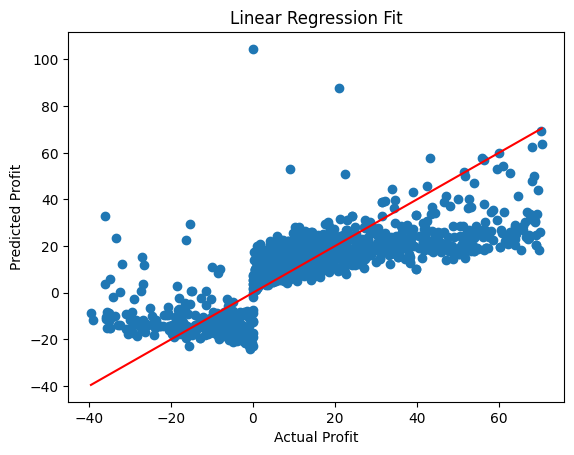

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Linear Regression Fit")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

Trained and evaluated a linear regression model to predict profit:
- Model trained on preprocessed features
- Performance metrics calculated (MSE(183.42609818376363) and R²(0.500827980352635))
- Visualized predictions vs actual values

**Profit Prediction with Random Forest Regression: Implementation and Result**

R² Score (Random Forest): 0.8929724360392176


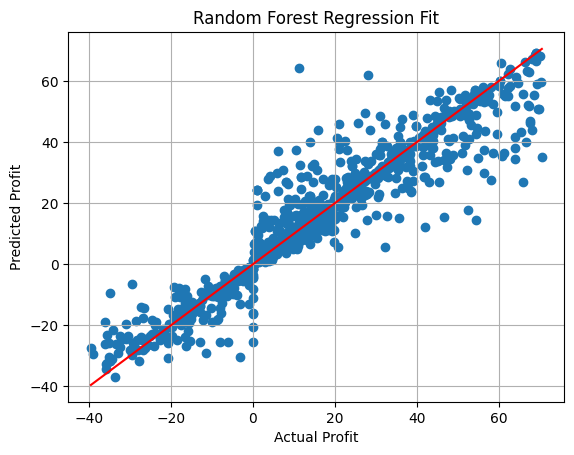

In [ ]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("R² Score (Random Forest):", r2_score(y_test, y_pred_rf))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Random Forest Regression Fit")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal fit line
plt.grid(True)
plt.show()

Trained Random Forest model on profit data
- Calculated R² score for performance evaluation(0.8929724360392176)
- Visualized actual vs predicted values with reference line

**Binary Classification Data Preparation**

In [ ]:
df['actual_profit'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

X_cls = df.drop(['Profit', 'actual_profit'], axis=1)
y_cls = df['actual_profit']

X_cls = pd.get_dummies(X_cls, drop_first=True)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


Created binary target (`actual_profit`: 1 if Profit > 0, else 0)
- Separated features (`X_cls`) and target (`y_cls`)
- Applied one-hot encoding to categorical features
- Split data into 80% train / 20% test sets

**Decision Tree Classifier: Implementation and evaluation**



Decision Tree Classifier Accuracy: 0.9479739869934968


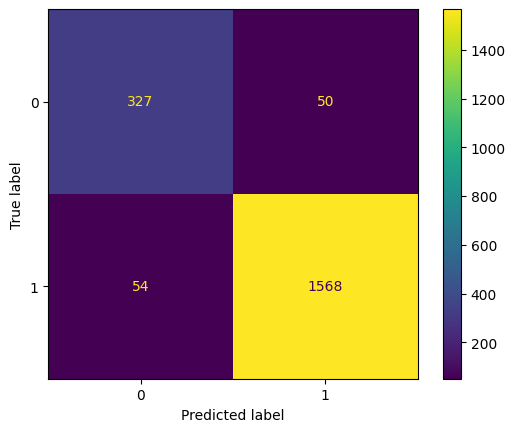

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_cls, y_train_cls)
y_pred_cls = dtc.predict(X_test_cls)

acc = accuracy_score(y_test_cls, y_pred_cls)
print("Decision Tree Classifier Accuracy:", acc)

cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

- Trained Decision Tree model on binary profit data
- Calculated accuracy score: 0.9479739869934968
- Visualized performance via confusion matrix

**Logistic Regression Classification Performance**

Test Accuracy: 0.9384692346173087


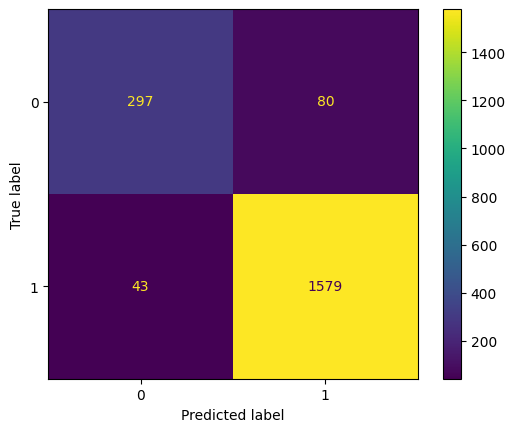

In [ ]:
log_Reg = LogisticRegression(max_iter=1000)

log_Reg.fit(X_train_cls, y_train_cls)

y_pred_cls = log_Reg.predict(X_test_cls)

acc = accuracy_score(y_test_cls, y_pred_cls)
print("Test Accuracy:", acc)

cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

 Trained Logistic Regression model (max_iter=1000 for convergence)
- Achieved test accuracy:0.93846923461730873%
- Confusion matrix shows classification performance

# **conclusion**

 ->Explored sales data using visualizations (bar plot, box plot, pie chart,
heatmap) to understand profit trends and correlations.

->Found that Technology category is most profitable, while high discounts often reduce profit.

->Trained four models:

->Linear & Random Forest Regressors for profit prediction (R² up to 0.9).

->Decision Tree & Logistic Regression for classification (accuracy up to 0.94).

->Models performed well, showing strong predictive capability.

->Project supports data-driven decisions for pricing and sales strategy.






# References

**Dataset** - https://drive.google.com/file/d/1CU-peUykiJBmaOGn0IAZwCXUD-AuA2IY/view?usp=drive_link